In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
five_shot_likelihoods = np.load("base_model_MMLU/" + f"eval_A_to_D_probs.npy")
correct_answer_idxs = np.load("base_model_MMLU/" + f"eval_answers.npy")

five_shot_likelihoods = five_shot_likelihoods[np.arange(0, len(five_shot_likelihoods)), correct_answer_idxs]

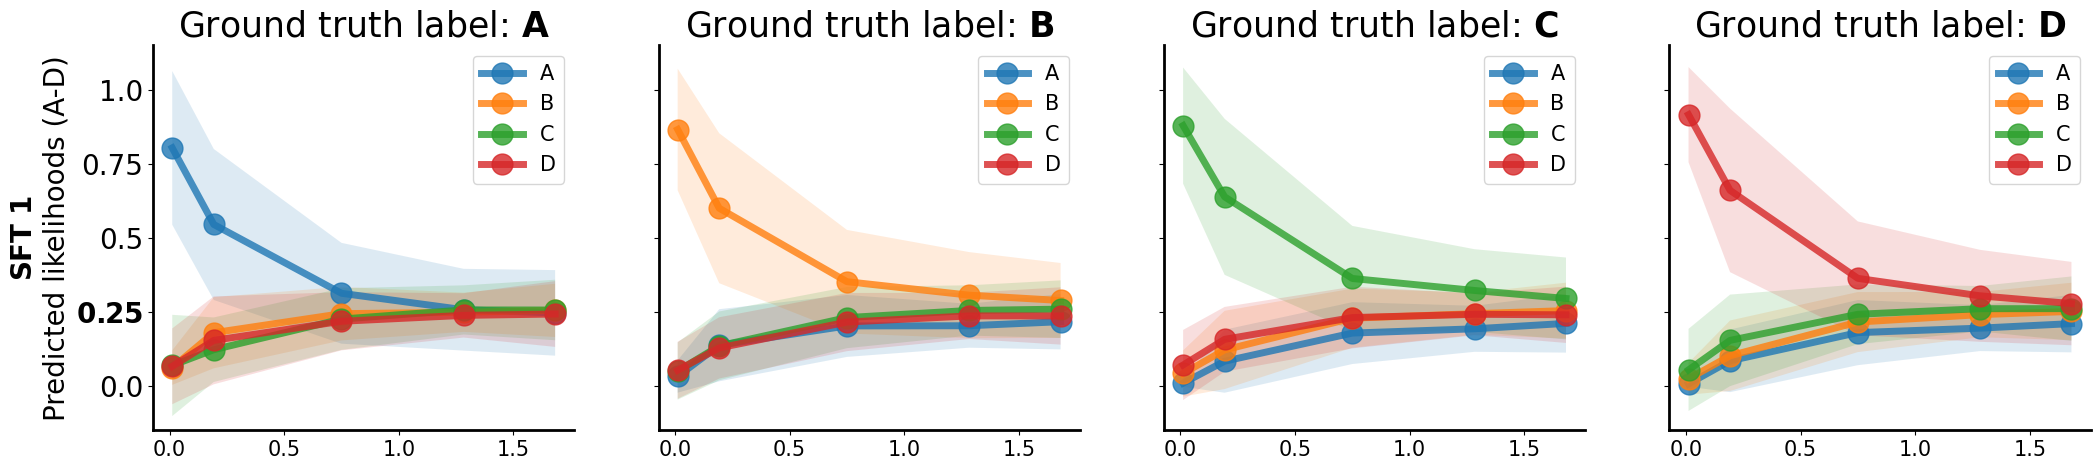

In [22]:
neg_log_likelihoods = -np.log(five_shot_likelihoods)


model_path = "ckpts/sft_mmlu_llama7B_3e-6_shuffle_2/checkpoint_02000/hf_model/"
# model_path = "ckpts/sft2_mmlu_llama7B_threshold0pt5_certainABCD/checkpoint_01000/hf_model/"

fig, axs = plt.subplots(1, 4, figsize=(25, 5), sharey=True, sharex=True)


# neg_log_likelihood_bins = [0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1]
# neg_log_likelihood_bins = [0, 0.6, 0.8, 1.0, 1.2, 1.4,]# 1.6]

neg_log_likelihood_bins = [0, 0.02, 0.5, 1, 1.5, 2,]

# neg_log_likelihood_bins = []
# for percentiles in [0, 5, 10, 20, 40, 60, 100]:
#     print("Percentile: ", percentiles, np.percentile(neg_log_likelihoods, percentiles))
#     neg_log_likelihood_bins.append(np.percentile(neg_log_likelihoods, percentiles))

labels = ["A", "B", "C", "D"]

for j in range(4):

    sft2_eval_A_to_D_probs = np.load(model_path + f"eval_A_to_D_probs_truth{labels[j]}.npy")
    sft2_neg_log_likelihoods = -np.log(sft2_eval_A_to_D_probs.max(-1))

    neg_log_likelihoods_bin_means = []

    A_to_D_likelihoods = {}
    A_to_D_likelihoods["A"] = []
    A_to_D_likelihoods["B"] = []
    A_to_D_likelihoods["C"] = []
    A_to_D_likelihoods["D"] = []

    A_to_D_likelihood_stds = {}
    A_to_D_likelihood_stds["A"] = []
    A_to_D_likelihood_stds["B"] = []
    A_to_D_likelihood_stds["C"] = []
    A_to_D_likelihood_stds["D"] = []
    for i in range(len(neg_log_likelihood_bins) - 1):
        bin_idxs = np.where((neg_log_likelihoods > neg_log_likelihood_bins[i]) & (neg_log_likelihoods < neg_log_likelihood_bins[i+1]))[0]
        A_to_D_likelihoods["A"].append(sft2_eval_A_to_D_probs[bin_idxs, 0].mean())
        A_to_D_likelihoods["B"].append(sft2_eval_A_to_D_probs[bin_idxs, 1].mean())
        A_to_D_likelihoods["C"].append(sft2_eval_A_to_D_probs[bin_idxs, 2].mean())
        A_to_D_likelihoods["D"].append(sft2_eval_A_to_D_probs[bin_idxs, 3].mean())

        A_to_D_likelihood_stds["A"].append(sft2_eval_A_to_D_probs[bin_idxs, 0].std())
        A_to_D_likelihood_stds["B"].append(sft2_eval_A_to_D_probs[bin_idxs, 1].std())
        A_to_D_likelihood_stds["C"].append(sft2_eval_A_to_D_probs[bin_idxs, 2].std())
        A_to_D_likelihood_stds["D"].append(sft2_eval_A_to_D_probs[bin_idxs, 3].std())
        neg_log_likelihoods_bin_means.append(neg_log_likelihoods[bin_idxs].mean())
    
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["A"], "o-", label="A", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["A"]) - np.array(A_to_D_likelihood_stds["A"]), np.array(A_to_D_likelihoods["A"]) + np.array(A_to_D_likelihood_stds["A"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["B"], "o-", label="B", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["B"]) - np.array(A_to_D_likelihood_stds["B"]), np.array(A_to_D_likelihoods["B"]) + np.array(A_to_D_likelihood_stds["B"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["C"], "o-", label="C", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["C"]) - np.array(A_to_D_likelihood_stds["C"]), np.array(A_to_D_likelihoods["C"]) + np.array(A_to_D_likelihood_stds["C"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["D"], "o-", label="D", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["D"]) - np.array(A_to_D_likelihood_stds["D"]), np.array(A_to_D_likelihoods["D"]) + np.array(A_to_D_likelihood_stds["D"]), alpha=0.15)

    axs[j].legend(fontsize=15)
    # axs[j].axhline(0.25, linestyle = "--" ,color = "black",  linewidth=2, alpha=0.8)
    # axs[j].axhline(0, linestyle = "--" ,color = "black",  linewidth=1.5, alpha=0.8)

    # axs[j].set_xticklabels(fontsize=15)
    axs[j].set_yticks([0 ,0.25, 0.5, 0.75, 1], [0.00 ,"$\mathbf{0.25}$", 0.5, 0.75, 1.0])
    axs[j].set_ylim([-0.15, 1.15])
    axs[j].xaxis.set_tick_params(labelsize=15)
    axs[j].yaxis.set_tick_params(labelsize=20)
    # axs[j].set_xlabel("Test Input Difficulty (NLL)", fontsize=20)
    if j==0:
        axs[j].set_ylabel("$\mathbf{SFT}$ $\mathbf{1}$\nPredicted likelihoods (A-D)", fontsize=20)
    axs[j].set_title("Ground truth label: $\mathbf{"+labels[j]+"}$", fontsize=25)
    axs[j].spines['bottom'].set_linewidth(2)
    axs[j].spines['left'].set_linewidth(2)

    axs[j].spines['top'].set_visible(False)
    axs[j].spines['right'].set_visible(False)
#make spines thicker
    
# plt.savefig("delete2.jpg")
# ax = plt.gca()

# plt.tick_params(axis='both', which='major', width=2)

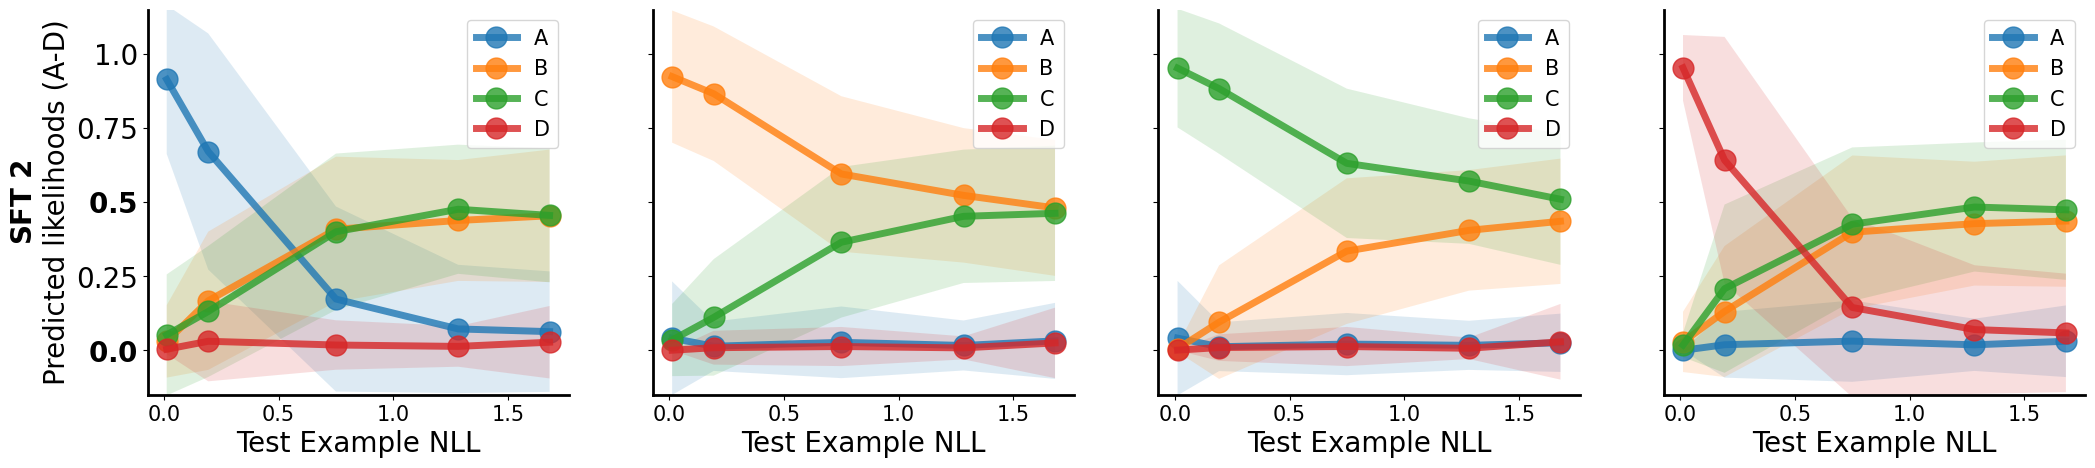

In [27]:
neg_log_likelihoods = -np.log(five_shot_likelihoods)


model_path = "ckpts/sft2_mmlu_llama7B_threshold0pt7_certainABCD_base_metric/checkpoint_02000/hf_model/" 

fig, axs = plt.subplots(1, 4, figsize=(25, 5), sharey=True, sharex=True)


# neg_log_likelihood_bins = [0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1]
# neg_log_likelihood_bins = [0, 0.6, 0.8, 1.0, 1.2, 1.4,]# 1.6]

neg_log_likelihood_bins = [0, 0.02, 0.5, 1, 1.5, 2,]

# neg_log_likelihood_bins = []
# for percentiles in [0, 5, 10, 20, 40, 60, 100]:
#     print("Percentile: ", percentiles, np.percentile(neg_log_likelihoods, percentiles))
#     neg_log_likelihood_bins.append(np.percentile(neg_log_likelihoods, percentiles))

labels = ["A", "B", "C", "D"]

for j in range(4):

    sft2_eval_A_to_D_probs = np.load(model_path + f"eval_A_to_D_probs_truth{labels[j]}.npy")
    sft2_neg_log_likelihoods = -np.log(sft2_eval_A_to_D_probs.max(-1))

    neg_log_likelihoods_bin_means = []

    A_to_D_likelihoods = {}
    A_to_D_likelihoods["A"] = []
    A_to_D_likelihoods["B"] = []
    A_to_D_likelihoods["C"] = []
    A_to_D_likelihoods["D"] = []

    A_to_D_likelihood_stds = {}
    A_to_D_likelihood_stds["A"] = []
    A_to_D_likelihood_stds["B"] = []
    A_to_D_likelihood_stds["C"] = []
    A_to_D_likelihood_stds["D"] = []
    for i in range(len(neg_log_likelihood_bins) - 1):
        bin_idxs = np.where((neg_log_likelihoods > neg_log_likelihood_bins[i]) & (neg_log_likelihoods < neg_log_likelihood_bins[i+1]))[0]
        A_to_D_likelihoods["A"].append(sft2_eval_A_to_D_probs[bin_idxs, 0].mean())
        A_to_D_likelihoods["B"].append(sft2_eval_A_to_D_probs[bin_idxs, 1].mean())
        A_to_D_likelihoods["C"].append(sft2_eval_A_to_D_probs[bin_idxs, 2].mean())
        A_to_D_likelihoods["D"].append(sft2_eval_A_to_D_probs[bin_idxs, 3].mean())

        A_to_D_likelihood_stds["A"].append(sft2_eval_A_to_D_probs[bin_idxs, 0].std())
        A_to_D_likelihood_stds["B"].append(sft2_eval_A_to_D_probs[bin_idxs, 1].std())
        A_to_D_likelihood_stds["C"].append(sft2_eval_A_to_D_probs[bin_idxs, 2].std())
        A_to_D_likelihood_stds["D"].append(sft2_eval_A_to_D_probs[bin_idxs, 3].std())
        neg_log_likelihoods_bin_means.append(neg_log_likelihoods[bin_idxs].mean())
    
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["A"], "o-", label="A", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["A"]) - np.array(A_to_D_likelihood_stds["A"]), np.array(A_to_D_likelihoods["A"]) + np.array(A_to_D_likelihood_stds["A"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["B"], "o-", label="B", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["B"]) - np.array(A_to_D_likelihood_stds["B"]), np.array(A_to_D_likelihoods["B"]) + np.array(A_to_D_likelihood_stds["B"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["C"], "o-", label="C", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["C"]) - np.array(A_to_D_likelihood_stds["C"]), np.array(A_to_D_likelihoods["C"]) + np.array(A_to_D_likelihood_stds["C"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["D"], "o-", label="D", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["D"]) - np.array(A_to_D_likelihood_stds["D"]), np.array(A_to_D_likelihoods["D"]) + np.array(A_to_D_likelihood_stds["D"]), alpha=0.15)

    axs[j].legend(fontsize=15)
    # axs[j].axhline(0.25, linestyle = "--" ,color = "black",  linewidth=2, alpha=0.8)
    # axs[j].axhline(0, linestyle = "--" ,color = "black",  linewidth=1.5, alpha=0.8)

    # axs[j].set_xticklabels(fontsize=15)
    axs[j].set_yticks([0 ,0.25, 0.5, 0.75, 1],  ["$\mathbf{0.0}$" ,0.25, "$\mathbf{0.5}$", 0.75, 1.0])
    axs[j].set_ylim([-0.15, 1.15])
    axs[j].xaxis.set_tick_params(labelsize=15)
    axs[j].yaxis.set_tick_params(labelsize=20)
    axs[j].set_xlabel("Test Example NLL", fontsize=20)
    if j==0:
        axs[j].set_ylabel("$\mathbf{SFT}$ $\mathbf{2}$\nPredicted likelihoods (A-D)", fontsize=20)
    # axs[j].set_title("Ground truth label: $\mathbf{"+labels[j]+"}$", fontsize=25)
    axs[j].spines['bottom'].set_linewidth(2)
    axs[j].spines['left'].set_linewidth(2)

    axs[j].spines['top'].set_visible(False)
    axs[j].spines['right'].set_visible(False)
#make spines thicker
    
# plt.savefig("delete2.jpg")
# ax = plt.gca()

# plt.tick_params(axis='both', which='major', width=2)

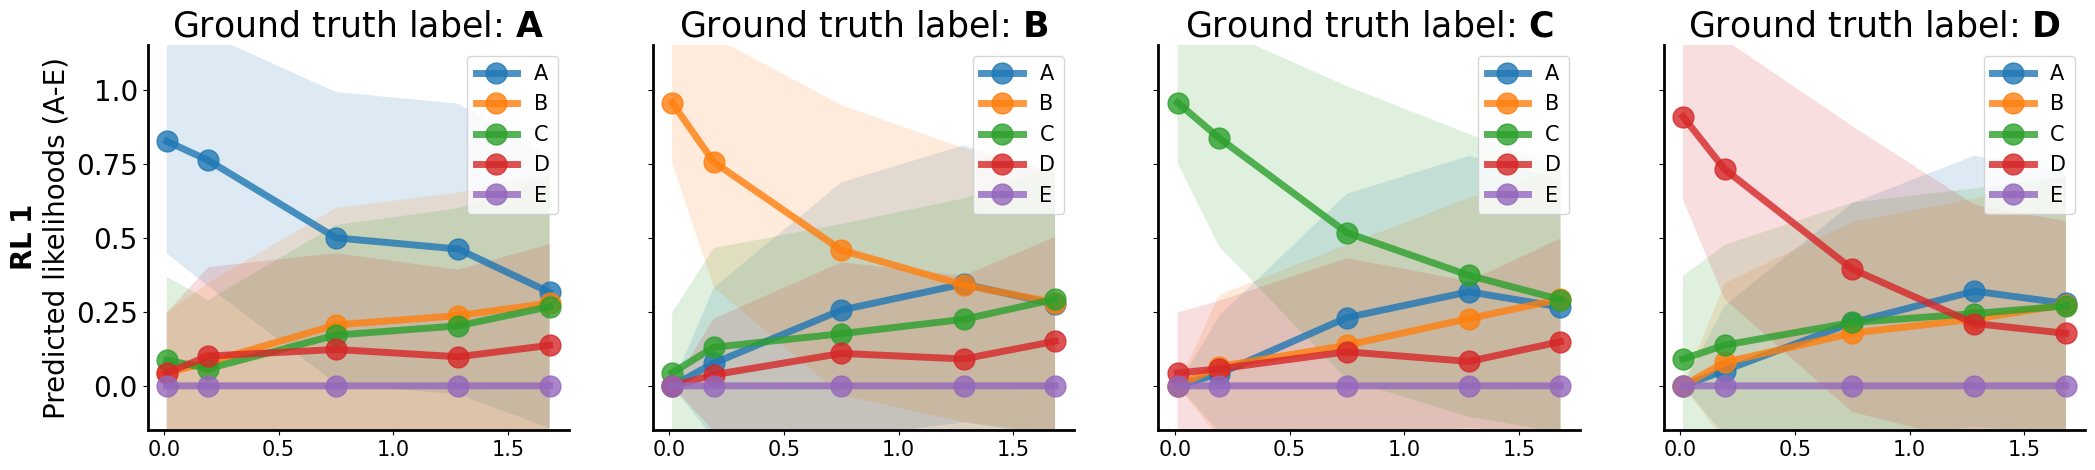

In [29]:

model_path = "ckpts/sft_mmlu_llama7B/checkpoint_01000/hf_model/"

# sft_eval_A_to_D_probs = np.load(model_path + "eval_A_to_D_probs.npy") 
# neg_log_likelihoods = -np.log(sft_eval_A_to_D_probs.max(-1))

# sft_eval_A_to_D_probs = (np.load(model_path + f"eval_A_to_D_probs_truthA.npy")[:, 0]+
#     np.load(model_path + f"eval_A_to_D_probs_truthB.npy")[:, 1]+
#     np.load(model_path + f"eval_A_to_D_probs_truthC.npy")[:, 2]+
#     np.load(model_path + f"eval_A_to_D_probs_truthD.npy")[:, 3])/4

# neg_log_likelihoods = -np.log(sft_eval_A_to_D_probs)


five_shot_likelihoods = np.load("base_model_MMLU/" + f"eval_A_to_D_probs.npy")
correct_answer_idxs = np.load("base_model_MMLU/" + f"eval_answers.npy")

five_shot_likelihoods = five_shot_likelihoods[np.arange(0, len(five_shot_likelihoods)), correct_answer_idxs]
neg_log_likelihoods = -np.log(five_shot_likelihoods)

# model_path = "ckpts/sft_mmlu_llama7B/checkpoint_02000/hf_model/"
model_path = "ckpts/ppo_mmlu_llama7B_true2_false-3_hedge-3/checkpoint_010000/hf_model/"

fig, axs = plt.subplots(1, 4, figsize=(25, 5), sharey=True, sharex=True)


# neg_log_likelihood_bins = [0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1]
# neg_log_likelihood_bins = [0, 0.6, 0.8, 1.0, 1.2, 1.4]#, 1.6]
neg_log_likelihood_bins =  [0, 0.02, 0.5, 1, 1.5, 2,]

# neg_log_likelihood_bins = []
# for percentiles in [0, 5, 10, 20, 40, 60, 100]:
#     print("Percentile: ", percentiles, np.percentile(neg_log_likelihoods, percentiles))
#     neg_log_likelihood_bins.append(np.percentile(neg_log_likelihoods, percentiles))

labels = ["A", "B", "C", "D"]

for j in range(4):

    sft2_eval_A_to_D_probs = np.load(model_path + f"eval_A_to_E_probs_truth{labels[j]}.npy")
    sft2_neg_log_likelihoods = -np.log(sft2_eval_A_to_D_probs.max(-1))

    neg_log_likelihoods_bin_means = []

    A_to_D_likelihoods = {}
    A_to_D_likelihoods["A"] = []
    A_to_D_likelihoods["B"] = []
    A_to_D_likelihoods["C"] = []
    A_to_D_likelihoods["D"] = []
    A_to_D_likelihoods["E"] = []

    A_to_D_likelihood_stds = {}
    A_to_D_likelihood_stds["A"] = []
    A_to_D_likelihood_stds["B"] = []
    A_to_D_likelihood_stds["C"] = []
    A_to_D_likelihood_stds["D"] = []
    A_to_D_likelihood_stds["E"] = []
    for i in range(len(neg_log_likelihood_bins) - 1):
        bin_idxs = np.where((neg_log_likelihoods > neg_log_likelihood_bins[i]) & (neg_log_likelihoods < neg_log_likelihood_bins[i+1]))[0]
        A_to_D_likelihoods["A"].append(sft2_eval_A_to_D_probs[bin_idxs, 0].mean())
        A_to_D_likelihoods["B"].append(sft2_eval_A_to_D_probs[bin_idxs, 1].mean())
        A_to_D_likelihoods["C"].append(sft2_eval_A_to_D_probs[bin_idxs, 2].mean())
        A_to_D_likelihoods["D"].append(sft2_eval_A_to_D_probs[bin_idxs, 3].mean())
        A_to_D_likelihoods["E"].append(sft2_eval_A_to_D_probs[bin_idxs, 4].mean())

        A_to_D_likelihood_stds["A"].append(sft2_eval_A_to_D_probs[bin_idxs, 0].std())
        A_to_D_likelihood_stds["B"].append(sft2_eval_A_to_D_probs[bin_idxs, 1].std())
        A_to_D_likelihood_stds["C"].append(sft2_eval_A_to_D_probs[bin_idxs, 2].std())
        A_to_D_likelihood_stds["D"].append(sft2_eval_A_to_D_probs[bin_idxs, 3].std())
        A_to_D_likelihood_stds["E"].append(sft2_eval_A_to_D_probs[bin_idxs, 4].std())
        neg_log_likelihoods_bin_means.append(neg_log_likelihoods[bin_idxs].mean())
    
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["A"], "o-", label="A", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["A"]) - np.array(A_to_D_likelihood_stds["A"]), np.array(A_to_D_likelihoods["A"]) + np.array(A_to_D_likelihood_stds["A"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["B"], "o-", label="B", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["B"]) - np.array(A_to_D_likelihood_stds["B"]), np.array(A_to_D_likelihoods["B"]) + np.array(A_to_D_likelihood_stds["B"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["C"], "o-", label="C", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["C"]) - np.array(A_to_D_likelihood_stds["C"]), np.array(A_to_D_likelihoods["C"]) + np.array(A_to_D_likelihood_stds["C"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["D"], "o-", label="D", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["D"]) - np.array(A_to_D_likelihood_stds["D"]), np.array(A_to_D_likelihoods["D"]) + np.array(A_to_D_likelihood_stds["D"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["E"], "o-", label="E", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["E"]) - np.array(A_to_D_likelihood_stds["E"]), np.array(A_to_D_likelihoods["E"]) + np.array(A_to_D_likelihood_stds["E"]), alpha=0.15)


    axs[j].legend(fontsize=15)
    # axs[j].axhline(0.5, linestyle = "--" ,color = "black",  linewidth=2, alpha=0.8)
    # axs[j].axhline(0, linestyle = "--" ,color = "black",  linewidth=2, alpha=0.8)
    # axs[j].axhline(0, linestyle = "--" ,color = "black",  linewidth=1.5, alpha=0.8)

    # axs[j].set_xticklabels(fontsize=15)
    axs[j].set_yticks([0 ,0.25, 0.5, 0.75, 1],[0. ,0.25, 0.5, 0.75, 1.])
    axs[j].set_ylim([-0.15, 1.15])
    axs[j].xaxis.set_tick_params(labelsize=15)
    axs[j].yaxis.set_tick_params(labelsize=20)
    # axs[j].set_xlabel("Test Example NLL", fontsize=20)
    if j==0:
        axs[j].set_ylabel("$\mathbf{RL}$ $\mathbf{1}$\nPredicted likelihoods (A-E)", fontsize=20)
    axs[j].set_title("Ground truth label: $\mathbf{"+labels[j]+"}$", fontsize=25)
    axs[j].spines['bottom'].set_linewidth(2)
    axs[j].spines['left'].set_linewidth(2)

    axs[j].spines['top'].set_visible(False)
    axs[j].spines['right'].set_visible(False)
#make spines thicker
    

# ax = plt.gca()

# plt.tick_params(axis='both', which='major', width=2)

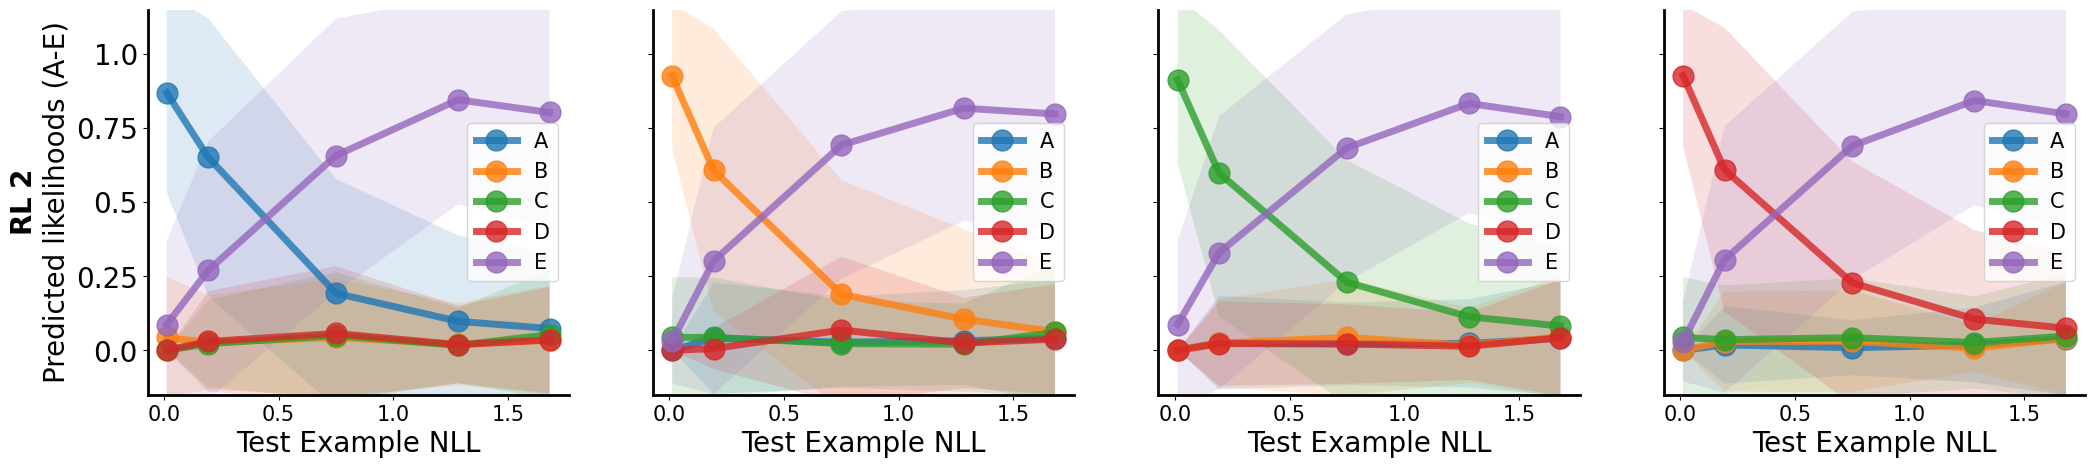

In [26]:

model_path = "ckpts/sft_mmlu_llama7B/checkpoint_01000/hf_model/"

# sft_eval_A_to_D_probs = np.load(model_path + "eval_A_to_D_probs.npy") 
# neg_log_likelihoods = -np.log(sft_eval_A_to_D_probs.max(-1))

# sft_eval_A_to_D_probs = (np.load(model_path + f"eval_A_to_D_probs_truthA.npy")[:, 0]+
#     np.load(model_path + f"eval_A_to_D_probs_truthB.npy")[:, 1]+
#     np.load(model_path + f"eval_A_to_D_probs_truthC.npy")[:, 2]+
#     np.load(model_path + f"eval_A_to_D_probs_truthD.npy")[:, 3])/4

# neg_log_likelihoods = -np.log(sft_eval_A_to_D_probs)


five_shot_likelihoods = np.load("base_model_MMLU/" + f"eval_A_to_D_probs.npy")
correct_answer_idxs = np.load("base_model_MMLU/" + f"eval_answers.npy")

five_shot_likelihoods = five_shot_likelihoods[np.arange(0, len(five_shot_likelihoods)), correct_answer_idxs]
neg_log_likelihoods = -np.log(five_shot_likelihoods)

# model_path = "ckpts/sft_mmlu_llama7B/checkpoint_02000/hf_model/"
model_path = "ckpts/ppo_mmlu_llama7B_true2_false-3/checkpoint_010000/hf_model/"

fig, axs = plt.subplots(1, 4, figsize=(25, 5), sharey=True, sharex=True)


# neg_log_likelihood_bins = [0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1]
# neg_log_likelihood_bins = [0, 0.6, 0.8, 1.0, 1.2, 1.4]#, 1.6]
neg_log_likelihood_bins =  [0, 0.02, 0.5, 1, 1.5, 2,]

# neg_log_likelihood_bins = []
# for percentiles in [0, 5, 10, 20, 40, 60, 100]:
#     print("Percentile: ", percentiles, np.percentile(neg_log_likelihoods, percentiles))
#     neg_log_likelihood_bins.append(np.percentile(neg_log_likelihoods, percentiles))

labels = ["A", "B", "C", "D"]

for j in range(4):

    sft2_eval_A_to_D_probs = np.load(model_path + f"eval_A_to_E_probs_truth{labels[j]}.npy")
    sft2_neg_log_likelihoods = -np.log(sft2_eval_A_to_D_probs.max(-1))

    neg_log_likelihoods_bin_means = []

    A_to_D_likelihoods = {}
    A_to_D_likelihoods["A"] = []
    A_to_D_likelihoods["B"] = []
    A_to_D_likelihoods["C"] = []
    A_to_D_likelihoods["D"] = []
    A_to_D_likelihoods["E"] = []

    A_to_D_likelihood_stds = {}
    A_to_D_likelihood_stds["A"] = []
    A_to_D_likelihood_stds["B"] = []
    A_to_D_likelihood_stds["C"] = []
    A_to_D_likelihood_stds["D"] = []
    A_to_D_likelihood_stds["E"] = []
    for i in range(len(neg_log_likelihood_bins) - 1):
        bin_idxs = np.where((neg_log_likelihoods > neg_log_likelihood_bins[i]) & (neg_log_likelihoods < neg_log_likelihood_bins[i+1]))[0]
        A_to_D_likelihoods["A"].append(sft2_eval_A_to_D_probs[bin_idxs, 0].mean())
        A_to_D_likelihoods["B"].append(sft2_eval_A_to_D_probs[bin_idxs, 1].mean())
        A_to_D_likelihoods["C"].append(sft2_eval_A_to_D_probs[bin_idxs, 2].mean())
        A_to_D_likelihoods["D"].append(sft2_eval_A_to_D_probs[bin_idxs, 3].mean())
        A_to_D_likelihoods["E"].append(sft2_eval_A_to_D_probs[bin_idxs, 4].mean())

        A_to_D_likelihood_stds["A"].append(sft2_eval_A_to_D_probs[bin_idxs, 0].std())
        A_to_D_likelihood_stds["B"].append(sft2_eval_A_to_D_probs[bin_idxs, 1].std())
        A_to_D_likelihood_stds["C"].append(sft2_eval_A_to_D_probs[bin_idxs, 2].std())
        A_to_D_likelihood_stds["D"].append(sft2_eval_A_to_D_probs[bin_idxs, 3].std())
        A_to_D_likelihood_stds["E"].append(sft2_eval_A_to_D_probs[bin_idxs, 4].std())
        neg_log_likelihoods_bin_means.append(neg_log_likelihoods[bin_idxs].mean())
    
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["A"], "o-", label="A", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["A"]) - np.array(A_to_D_likelihood_stds["A"]), np.array(A_to_D_likelihoods["A"]) + np.array(A_to_D_likelihood_stds["A"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["B"], "o-", label="B", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["B"]) - np.array(A_to_D_likelihood_stds["B"]), np.array(A_to_D_likelihoods["B"]) + np.array(A_to_D_likelihood_stds["B"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["C"], "o-", label="C", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["C"]) - np.array(A_to_D_likelihood_stds["C"]), np.array(A_to_D_likelihoods["C"]) + np.array(A_to_D_likelihood_stds["C"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["D"], "o-", label="D", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["D"]) - np.array(A_to_D_likelihood_stds["D"]), np.array(A_to_D_likelihoods["D"]) + np.array(A_to_D_likelihood_stds["D"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["E"], "o-", label="E", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["E"]) - np.array(A_to_D_likelihood_stds["E"]), np.array(A_to_D_likelihoods["E"]) + np.array(A_to_D_likelihood_stds["E"]), alpha=0.15)


    axs[j].legend(fontsize=15)
    # axs[j].axhline(0.5, linestyle = "--" ,color = "black",  linewidth=2, alpha=0.8)
    # axs[j].axhline(0, linestyle = "--" ,color = "black",  linewidth=2, alpha=0.8)
    # axs[j].axhline(0, linestyle = "--" ,color = "black",  linewidth=1.5, alpha=0.8)

    # axs[j].set_xticklabels(fontsize=15)
    axs[j].set_yticks([0 ,0.25, 0.5, 0.75, 1],[0. ,0.25, 0.5, 0.75, 1.])
    axs[j].set_ylim([-0.15, 1.15])
    axs[j].xaxis.set_tick_params(labelsize=15)
    axs[j].yaxis.set_tick_params(labelsize=20)
    axs[j].set_xlabel("Test Example NLL", fontsize=20)
    if j==0:
        axs[j].set_ylabel("$\mathbf{RL}$ $\mathbf{2}$\nPredicted likelihoods (A-E)", fontsize=20)
    # axs[j].set_title("Ground truth label: "+labels[j], fontsize=20)
    axs[j].spines['bottom'].set_linewidth(2)
    axs[j].spines['left'].set_linewidth(2)

    axs[j].spines['top'].set_visible(False)
    axs[j].spines['right'].set_visible(False)
#make spines thicker
    

# ax = plt.gca()

# plt.tick_params(axis='both', which='major', width=2)